In [18]:
## Goal: Explore data w/ visualizations for Adventure Works dataset
      #    for purpose of Classification Supervised ML w/ label= AveMonthSpend

# Import Python pkgs pandas, numpy, matplotlib.pyplot, & seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss

%matplotlib inline  
# Start of magic command which configures execution environment, to display graphics w/in notebook

In [19]:
# Load already prepared dataset, display shape, & explore first 10 rows of Pandas data frame

AW_Custs_R = pd.read_csv('AW_Custs_R_Preped.csv', header=0)
print(AW_Custs_R.shape)
AW_Custs_R.head(5)

(16404, 25)


,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,...,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,AveMonthSpend,BikeBuyer,AgeGroup,log_AveMonthSpend,log_Age,log_YearlyIncome
0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,4/8/1966,Bachelors,...,0,2,137947,31,89,0,25-45,4.488636,3.433987,11.834625
1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,5/14/1965,Bachelors,...,3,3,101141,32,117,1,25-45,4.762174,3.465736,11.524271
2,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,8/12/1965,Bachelors,...,3,3,91945,32,123,0,25-45,4.812184,3.465736,11.428946
3,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,2/15/1968,Bachelors,...,0,0,86688,29,50,0,25-45,3.912023,3.367296,11.370071
4,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,8/8/1968,Bachelors,...,5,5,92771,29,95,1,25-45,4.553877,3.367296,11.437889


In [20]:
# Testing for Class Imbalance by Examining Classes where label= BikeBuyer
 # Unequal numbers of cases for the categories of labels, which can seriously bias the training of classifier alogrithms 
 #  higher error rate for the minority class. This should be tested for before training any model.   

AW_Custs_R_counts =  AW_Custs_R['AveMonthSpend'].value_counts()
print(AW_Custs_R_counts) 

48     386
52     378
51     367
47     364
50     361
49     359
46     334
53     333
54     332
45     312
76     304
75     298
77     290
43     289
55     275
73     270
74     265
68     264
72     262
79     262
56     261
70     259
78     254
57     252
66     250
71     249
44     242
69     235
65     234
64     234
      ... 
124     19
132     19
120     19
128     17
167     17
158     17
33      16
144     16
162     15
159     14
163     14
32      13
169     13
161     12
166     12
164     11
170      7
171      6
29       5
31       5
172      4
173      4
26       3
30       3
25       2
176      2
174      2
175      2
24       1
22       1
Name: AveMonthSpend, Length: 152, dtype: int64


In [21]:
#Above- Knowing imbalance exists, the best accuracy we can get w/out creating a ML model is 70%.
 # This is achieved by guessing all customers will buy a bike
    
#Below- Create a numpy array of label values

labels = np.array(AW_Custs_R['AveMonthSpend'])
log_labels = np.array(AW_Custs_R['log_AveMonthSpend'])

In [31]:
#Create a numpy array with all of the features (Model Matrix)
 # Encode categorical string variables into integers. 
 # Transform integer coded variables to dummy variables.
 # Append each dummy coded categorical variable to model matrix.
    
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()  # Encode strings to numeric categories
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ohe = preprocessing.OneHotEncoder()  #Apply One Hot Encoder
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education', 'Gender', 'MaritalStatus', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']

Features = encode_string(AW_Custs_R['Occupation'])
for col in categorical_columns:
    temp = encode_string(AW_Custs_R[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 31)
[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0.]]


In [32]:
# 6 categorical variables were converted into 31 dummy variables. 

# Append numeric features to model matrix

Norm_Features = np.concatenate([Features, np.array(AW_Custs_R[['YearlyIncome', 'Age']])], axis = 1)

print(Norm_Features.shape)
print(Norm_Features[:2, :])

(16404, 33)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.37947e+05 3.10000e+01]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 1.01141e+05 3.20000e+01]]


In [34]:
# 6 categorical variables were converted into 31 dummy variables. 

# Append numeric features to model matrix

log_Features = np.concatenate([Features, np.array(AW_Custs_R[['log_YearlyIncome', 'log_Age']])], axis = 1)

print(log_Features.shape)
print(log_Features[:2, :])

(16404, 33)
[[ 0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.
   1.          0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.         11.83462483  3.4339872 ]
 [ 0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.
   0.          1.          0.          1.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          1.          0.
   0.         11.52427086  3.4657359 ]]


In [35]:
# 6 categorical variables were converted into 31 dummy variables. 

# Append numeric features to model matrix

logYI_Features = np.concatenate([Features, np.array(AW_Custs_R[['log_YearlyIncome', 'Age']])], axis = 1)

print(logYI_Features.shape)
print(logYI_Features[:2, :])

(16404, 33)
[[ 0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.
   1.          0.          1.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.         11.83462483 31.        ]
 [ 0.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          1.
   0.          1.          0.          1.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          1.          0.
   0.         11.52427086 32.        ]]


In [36]:
# 6 categorical variables were converted into 31 dummy variables. 

# Append numeric features to model matrix

logA_Features = np.concatenate([Features, np.array(AW_Custs_R[['YearlyIncome', 'log_Age']])], axis = 1)

print(logA_Features.shape)
print(logA_Features[:2, :])

(16404, 33)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3794700e+05 3.4339872e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0114100e+05 3.4657359e+00]]


In [37]:
# 2 numerical variables appended to matrix

#Below- How many dummy variables came from checking_account_status? -5-
print(AW_Custs_R['Occupation'].unique())

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']


In [38]:
## Normal Features & Label
#Create randomly sampled training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(Norm_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
x_train = Norm_Features[indx[0], :]
y_train = np.ravel(labels[indx[0]])
x_test = Norm_Features[indx[1], :]
y_test = np.ravel(labels[indx[1]])

In [39]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(x_train[:, 31:])
x_train[:, 31:] = scaler.transform(x_train[:, 31:])
x_test[:, 31:] = scaler.transform(x_test[:, 31:])
x_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.69691521,  0.49520055],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60823408, -1.28925519],
       [ 0.        ,  1.    

In [40]:
# Make the linear regression model using sklearn import linear_model

lin_mod = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod.fit(x_train, y_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [41]:
#Examine intercept and coefficients of training data

print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.83467061e+13  3.83467061e+13  3.83467061e+13  3.83467061e+13
  3.83467061e+13  2.08195299e+13  2.08195299e+13  2.08195299e+13
  2.08195299e+13  2.08195299e+13  4.47670354e+13  4.47670354e+13
 -5.44213331e+13 -5.44213331e+13 -7.16723129e+12 -7.16723129e+12
 -7.16723129e+12 -7.16723129e+12 -7.16723129e+12 -2.60621570e+13
 -2.60621570e+13 -2.60621570e+13 -2.60621570e+13 -2.60621570e+13
 -2.60621570e+13 -1.62825500e+13 -1.62825500e+13 -1.62825500e+13
 -1.62825500e+13 -1.62825500e+13 -1.62825500e+13  8.50781250e+00
 -1.60937500e+00]


In [42]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
y_score = lin_mod.predict(x_test)
print_metrics(y_test, y_score, 28)

Mean Square Error      = 38.40688095126152
Root Mean Square Error = 6.197328533429668
Mean Absolute Error    = 4.74363349609375
Median Absolute Error  = 3.8134765625
R^2                    = 0.9487616386914202
Adjusted R^2           = 0.9484833933665344


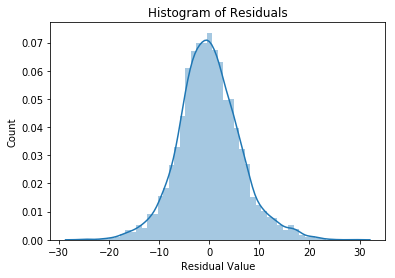

In [43]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are barely different, indicating model may not be overfit & might generalize well.
    
def hist_resids(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids(y_test, y_score)

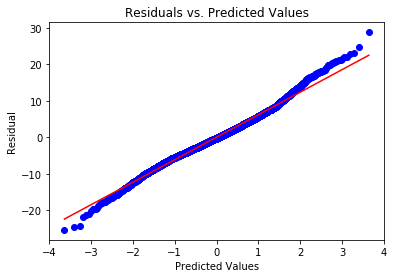

In [44]:
#Above- Residuals are large in range, but noticably Gaussian in distribution

#Below- Examine Q-Q normal plot

def resid_qq(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

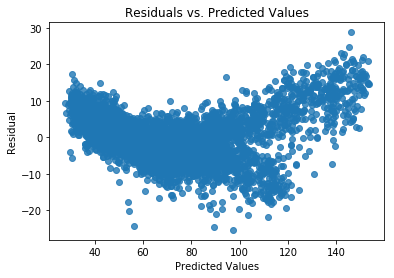

In [45]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot(y_test, y_score):
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))   #comput vector of residuals
    sns.regplot(y_score, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot(y_test, y_score)

In [46]:
## Normal Features w/ Log of Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(Norm_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
x_train = Norm_Features[indx[0], :]
logy_train = np.ravel(log_labels[indx[0]])
x_test = Norm_Features[indx[1], :]
logy_test = np.ravel(log_labels[indx[1]])

In [47]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(x_train[:, 31:])
x_train[:, 31:] = scaler.transform(x_train[:, 31:])
x_test[:, 31:] = scaler.transform(x_test[:, 31:])
x_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.69691521,  0.49520055],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60823408, -1.28925519],
       [ 0.        ,  1.    

In [49]:
# Make the linear regression model using sklearn import linear_model

lin_mod2 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod2.fit(x_train, logy_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [50]:
#Examine intercept and coefficients of training data

print(lin_mod2.intercept_)
print(lin_mod2.coef_)

0.0
[ 5.46613018e+11  5.46613018e+11  5.46613018e+11  5.46613018e+11
  5.46613018e+11  3.09734995e+11  3.09734995e+11  3.09734995e+11
  3.09734995e+11  3.09734995e+11  5.90363307e+11  5.90363307e+11
 -6.98002353e+11 -6.98002353e+11 -1.11139291e+11 -1.11139291e+11
 -1.11139291e+11 -1.11139291e+11 -1.11139291e+11 -3.91886799e+11
 -3.91886799e+11 -3.91886799e+11 -3.91886799e+11 -3.91886799e+11
 -3.91886799e+11 -2.45682877e+11 -2.45682877e+11 -2.45682877e+11
 -2.45682877e+11 -2.45682877e+11 -2.45682877e+11  9.88769531e-02
 -3.22875977e-02]


In [122]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics2(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
y_score2 = lin_mod2.predict(x_test)
print_metrics2(logy_test, y_score2, 28)

Mean Square Error      = 0.003523475733716043
Root Mean Square Error = 0.059358872409405176
Mean Absolute Error    = 0.0452751308072435
Median Absolute Error  = 0.03615359655672323
R^2                    = 0.9704616681429882
Adjusted R^2           = 0.970301262881496


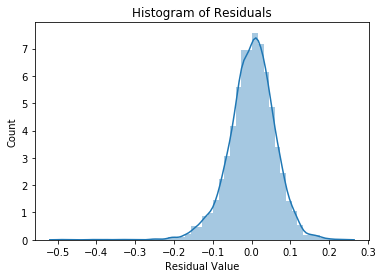

In [123]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are barely different, indicating model may not be overfit & might generalize well.
    
def hist_resids2(logy_test, y_score2):
    resids = np.subtract(logy_test.reshape(-1,1), y_score2.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids2(logy_test, y_score2)

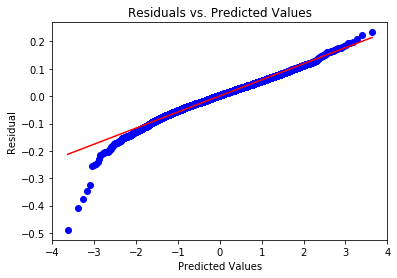

In [124]:
#Above- Residuals are large in range, but noticably Gaussian in distribution

#Below- Examine Q-Q normal plot

def resid_qq2(logy_test, y_score2):
    resids = np.subtract(logy_test.reshape(-1,1), y_score2.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq2(logy_test, y_score2)

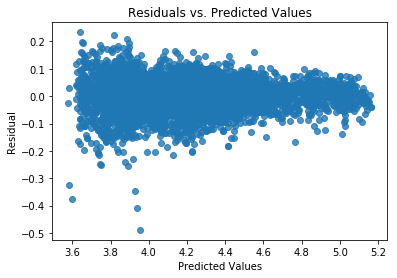

In [101]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot2(logy_test, y_score):
    resids = np.subtract(logy_test.reshape(-1,1), y_score.reshape(-1,1))   #comput vector of residuals
    sns.regplot(y_score, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot2(logy_test, y_score)

In [62]:
## Log Features w/ Log of Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(log_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
logx_train = log_Features[indx[0], :]
logy_train = np.ravel(log_labels[indx[0]])
logx_test = log_Features[indx[1], :]
logy_test = np.ravel(log_labels[indx[1]])

In [63]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(logx_train[:, 31:])
logx_train[:, 31:] = scaler.transform(logx_train[:, 31:])
logx_test[:, 31:] = scaler.transform(logx_test[:, 31:])
logx_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.43845561,  0.61394552],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69359986, -1.48812679],
       [ 0.        ,  1.    

In [64]:
# Make the linear regression model using sklearn import linear_model

lin_mod3 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod3.fit(logx_train, logy_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [65]:
#Examine intercept and coefficients of training data

print(lin_mod3.intercept_)
print(lin_mod3.coef_)

0.0
[ 5.38407926e+11  5.38407926e+11  5.38407926e+11  5.38407926e+11
  5.38407926e+11  2.56787160e+11  2.56787160e+11  2.56787160e+11
  2.56787160e+11  2.56787160e+11  2.79862779e+11  2.79862779e+11
 -5.13366254e+11 -5.13366254e+11 -4.17524110e+10 -4.17524110e+10
 -4.17524110e+10 -4.17524110e+10 -4.17524110e+10 -2.90556251e+11
 -2.90556251e+11 -2.90556251e+11 -2.90556251e+11 -2.90556251e+11
 -2.90556251e+11 -2.29382950e+11 -2.29382950e+11 -2.29382950e+11
 -2.29382950e+11 -2.29382950e+11 -2.29382950e+11  1.07269287e-01
 -1.99584961e-02]


In [125]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics3(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
logy_score3 = lin_mod3.predict(logx_test)
print_metrics3(logy_test, logy_score3, 28)

Mean Square Error      = 0.003789863628237121
Root Mean Square Error = 0.06156186829716201
Mean Absolute Error    = 0.04613762148253759
Median Absolute Error  = 0.03606562772050781
R^2                    = 0.9682284601898982
Adjusted R^2           = 0.9680559276929407


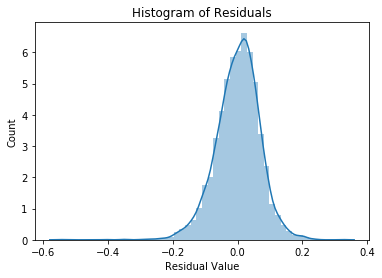

In [103]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are barely different, indicating model may not be overfit & might generalize well.
    
def hist_resids3(logy_test, logy_score3):
    resids = np.subtract(logy_test.reshape(-1,1), logy_score3.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids3(logy_test, logy_score3)

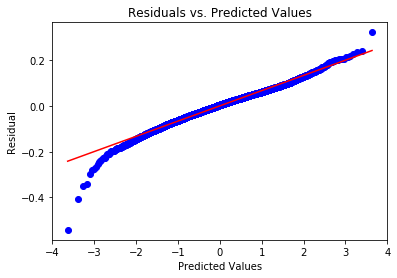

In [104]:
#Above- Residuals are large in range, but noticably Gaussian in distribution

#Below- Examine Q-Q normal plot

def resid_qq3(logy_test, logy_score3):
    resids = np.subtract(logy_test.reshape(-1,1), logy_score3.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq3(logy_test, logy_score3)

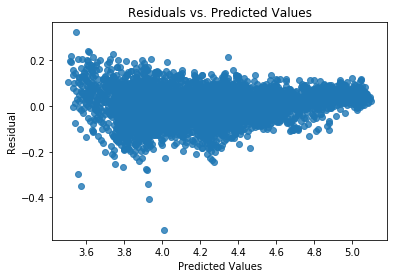

In [105]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot3(logy_test, logy_score3):
    resids = np.subtract(logy_test.reshape(-1,1), logy_score3.reshape(-1,1))   #comput vector of residuals
    sns.regplot(logy_score3, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot3(logy_test, logy_score3)

In [70]:
## Log YearlyIncome Feature only w/ normal Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(logYI_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
logYIx_train = logYI_Features[indx[0], :]
y_train = np.ravel(labels[indx[0]])
logYIx_test = logYI_Features[indx[1], :]
y_test = np.ravel(labels[indx[1]])

In [71]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(logYIx_train[:, 31:])
logYIx_train[:, 31:] = scaler.transform(logYIx_train[:, 31:])
logYIx_test[:, 31:] = scaler.transform(logYIx_test[:, 31:])
logYIx_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.43845561,  0.49520055],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69359986, -1.28925519],
       [ 0.        ,  1.    

In [72]:
# Make the linear regression model using sklearn import linear_model

lin_mod4 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod4.fit(logYIx_train, y_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [73]:
#Examine intercept and coefficients of training data

print(lin_mod4.intercept_)
print(lin_mod4.coef_)

0.0
[ 3.91856483e+13  3.91856483e+13  3.91856483e+13  3.91856483e+13
  3.91856483e+13  2.41488153e+13  2.41488153e+13  2.41488153e+13
  2.41488153e+13  2.41488153e+13  2.35376036e+12  2.35376036e+12
 -3.99889679e+13 -3.99889679e+13  7.49697901e+12  7.49697901e+12
  7.49697901e+12  7.49697901e+12  7.49697901e+12 -1.63989584e+13
 -1.63989584e+13 -1.63989584e+13 -1.63989584e+13 -1.63989584e+13
 -1.63989584e+13 -1.67972768e+13 -1.67972768e+13 -1.67972768e+13
 -1.67972768e+13 -1.67972768e+13 -1.67972768e+13  7.39062500e+00
 -1.62109375e+00]


In [126]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics4(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
logy_score4 = lin_mod4.predict(logYIx_test)
print_metrics4(y_test, logy_score4, 28)

Mean Square Error      = 44.28904762400985
Root Mean Square Error = 6.655001699775128
Mean Absolute Error    = 5.062090283203125
Median Absolute Error  = 3.90234375
R^2                    = 0.9409142797341011
Adjusted R^2           = 0.9405934200303241


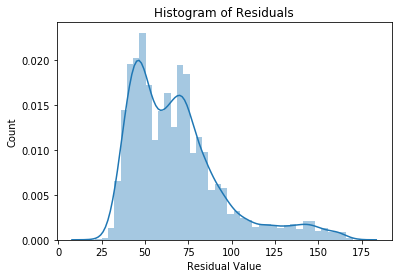

In [107]:
#Above- RMSE, MAE, Median absolute error are small & in similiar range. 
 # R^2 & R^2adj are barely different, indicating model may not be overfit & might generalize well.
    
def hist_resids4(y_test, logy_score4):
    resids = np.subtract(y_test.reshape(-1,1), logy_score4.reshape(-1,1))  #compute vector of residuals
    sns.distplot(resids)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual Value')
    plt.ylabel('Count')
    
hist_resids4(y_test, logy_score4)

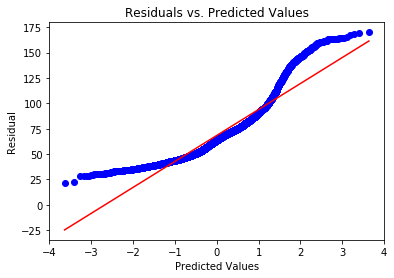

In [108]:
#Above- Residuals are large in range, but noticably Gaussian in distribution

#Below- Examine Q-Q normal plot

def resid_qq4(y_test, logy_score4):
    resids = np.subtract(y_test.reshape(-1,1), logy_score4.reshape(-1,1))  #compute vector of residuals
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_qq4(y_test, logy_score4)

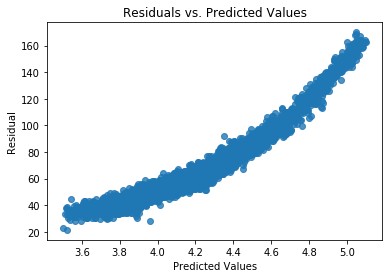

In [109]:
#Above- close to normally distributed with large residuals deviating from line (skew)

#Below- Display plot of residuals vs. predicted values

def resid_plot4(y_test, logy_score4):
    resids = np.subtract(y_test.reshape(-1,1), logy_score4.reshape(-1,1))   #comput vector of residuals
    sns.regplot(logy_score4, resids, fit_reg = False)
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residual')
    
resid_plot4(y_test, logy_score4)

In [78]:
## Log YearlyIncome Feature only w/ log Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(logYI_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
logYIx_train = logYI_Features[indx[0], :]
logy_train = np.ravel(log_labels[indx[0]])
logYIx_test = logYI_Features[indx[1], :]
logy_test = np.ravel(log_labels[indx[1]])

In [79]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(logYIx_train[:, 31:])
logYIx_train[:, 31:] = scaler.transform(logYIx_train[:, 31:])
logYIx_test[:, 31:] = scaler.transform(logYIx_test[:, 31:])
logYIx_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.43845561,  0.49520055],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69359986, -1.28925519],
       [ 0.        ,  1.    

In [80]:
# Make the linear regression model using sklearn import linear_model

lin_mod5 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod5.fit(logYIx_train, logy_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [81]:
#Examine intercept and coefficients of training data

print(lin_mod5.intercept_)
print(lin_mod5.coef_)

0.0
[ 5.32606713e+11  5.32606713e+11  5.32606713e+11  5.32606713e+11
  5.32606713e+11  3.23717443e+11  3.23717443e+11  3.23717443e+11
  3.23717443e+11  3.23717443e+11  1.35123078e+11  1.35123078e+11
 -5.02482920e+11 -5.02482920e+11  4.48025570e+10  4.48025570e+10
  4.48025570e+10  4.48025570e+10  4.48025570e+10 -2.60796637e+11
 -2.60796637e+11 -2.60796637e+11 -2.60796637e+11 -2.60796637e+11
 -2.60796637e+11 -2.72970234e+11 -2.72970234e+11 -2.72970234e+11
 -2.72970234e+11 -2.72970234e+11 -2.72970234e+11  1.04919434e-01
 -3.16772461e-02]


In [127]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics5(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
logy_score5 = lin_mod5.predict(logYIx_test)
print_metrics5(logy_test, logy_score5, 28)

Mean Square Error      = 0.0035467045884896805
Root Mean Square Error = 0.059554215539201594
Mean Absolute Error    = 0.04529578600142536
Median Absolute Error  = 0.0360215067476819
R^2                    = 0.9702669338315251
Adjusted R^2           = 0.9701054710828225


In [111]:
## Log Age Feature only w/ log Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(logA_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
logAx_train = logA_Features[indx[0], :]
logy_train = np.ravel(log_labels[indx[0]])
logAx_test = logA_Features[indx[1], :]
logy_test = np.ravel(log_labels[indx[1]])

In [112]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(logAx_train[:, 31:])
logAx_train[:, 31:] = scaler.transform(logAx_train[:, 31:])
logAx_test[:, 31:] = scaler.transform(logAx_test[:, 31:])
logAx_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.69691521,  0.61394552],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60823408, -1.48812679],
       [ 0.        ,  1.    

In [113]:
# Make the linear regression model using sklearn import linear_model

lin_mod6 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod6.fit(logAx_train, logy_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [114]:
#Examine intercept and coefficients of training data

print(lin_mod6.intercept_)
print(lin_mod6.coef_)

0.0
[ 5.31312012e+11  5.31312012e+11  5.31312012e+11  5.31312012e+11
  5.31312012e+11  4.50274114e+11  4.50274114e+11  4.50274114e+11
  4.50274114e+11  4.50274114e+11  4.48615849e+11  4.48615849e+11
 -7.18294446e+11 -7.18294446e+11 -1.02626327e+11 -1.02626327e+11
 -1.02626327e+11 -1.02626327e+11 -1.02626327e+11 -3.42380664e+11
 -3.42380664e+11 -3.42380664e+11 -3.42380664e+11 -3.42380664e+11
 -3.42380664e+11 -2.66900538e+11 -2.66900538e+11 -2.66900538e+11
 -2.66900538e+11 -2.66900538e+11 -2.66900538e+11  1.00830078e-01
 -2.12402344e-02]


In [128]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics6(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
logy_score6 = lin_mod6.predict(logAx_test)
print_metrics6(logy_test, logy_score6, 28)

Mean Square Error      = 0.003774042675746019
Root Mean Square Error = 0.061433237548952434
Mean Absolute Error    = 0.04624131293974493
Median Absolute Error  = 0.036737517829389166
R^2                    = 0.9683610918809594
Adjusted R^2           = 0.9681892796285029


In [116]:
## Log Age Feature only w/ normal Label
 #Create randomly sampled log-y training & test data (Bernoulli sample) sets from sklearn.model_selection

nr.seed(9988)  #set seed
indx = range(logA_Features.shape[0])
indx = ms.train_test_split(indx, test_size = 5000)
logAx_train = logA_Features[indx[0], :]
y_train = np.ravel(labels[indx[0]])
logAx_test = logA_Features[indx[1], :]
y_test = np.ravel(labels[indx[1]])

In [117]:
# Need to rescale the numeric features so they don't carry a larger influence on 
 #the model using scikit learn to Zscore numeric features first on training then test data set

scaler = preprocessing.StandardScaler().fit(logAx_train[:, 31:])
logAx_train[:, 31:] = scaler.transform(logAx_train[:, 31:])
logAx_test[:, 31:] = scaler.transform(logAx_test[:, 31:])
logAx_train[:5, :]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.69691521,  0.61394552],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.60823408, -1.48812679],
       [ 0.        ,  1.    

In [118]:
# Make the linear regression model using sklearn import linear_model

lin_mod7 = linear_model.LinearRegression(fit_intercept = False)  #intercept will be accomidated in coefficients of dummy variables
lin_mod7.fit(logAx_train, y_train)  #fit the model w/ numpy array of features & label

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [119]:
#Examine intercept and coefficients of training data

print(lin_mod7.intercept_)
print(lin_mod7.coef_)

0.0
[ 3.71588957e+13  3.71588957e+13  3.71588957e+13  3.71588957e+13
  3.71588957e+13  2.80386692e+13  2.80386692e+13  2.80386692e+13
  2.80386692e+13  2.80386692e+13  3.04569874e+13  3.04569874e+13
 -5.20247146e+13 -5.20247146e+13 -6.08846062e+12 -6.08846062e+12
 -6.08846062e+12 -6.08846062e+12 -6.08846062e+12 -2.08494626e+13
 -2.08494626e+13 -2.08494626e+13 -2.08494626e+13 -2.08494626e+13
 -2.08494626e+13 -1.66919145e+13 -1.66919145e+13 -1.66919145e+13
 -1.66919145e+13 -1.66919145e+13 -1.66919145e+13  8.57812500e+00
 -9.80468750e-01]


In [129]:
#Above- Intercept is 0.0. Dummy variables are in similiar range, indicating bias/intercept has been
 # incorporated in them. Numerical values increase for first variable but weakly decrease for second.
    
#Below- Evaluate performance of model using test data set by computing performance metrics

def print_metrics7(y_true, y_predicted, n_parameters):
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters -1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
logy_score7 = lin_mod7.predict(logAx_test)
print_metrics7(y_test, logy_score7, 28)

Mean Square Error      = 39.0641599363327
Root Mean Square Error = 6.2501327934958875
Mean Absolute Error    = 4.75975546875
Median Absolute Error  = 3.765625
R^2                    = 0.9478847672224677
Adjusted R^2           = 0.9476017601257273


In [ ]:
#Above- Fairly constant dispersion w/ noticable positive large residual

#Below- Above plot is for log of prices, need to convert back to normal prices.

y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform)